In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
STOP_WORDS = nltk.corpus.stopwords.words()
farewell = open("./farewell.txt", "r", encoding=('utf-8')).read()
def tokenize(text):
    broken_text = text.replace('\n', ' ')
    result = []
    for i in nltk.tokenize.sent_tokenize(broken_text):
        temp = []
        for j in nltk.tokenize.word_tokenize(i):
            temp.append(j.lower())
        result.append(temp)
    return result
farewell = tokenize(farewell)

In [9]:
model = word2vec.Word2Vec(farewell, size=100, window=20, min_count=10, workers=4)
model.wv['farewell']

array([ 8.72152373e-02, -8.87098536e-02,  1.47040740e-01,  4.56623025e-02,
       -3.95341823e-03, -1.90692589e-01,  7.82861188e-02, -6.09638169e-02,
       -2.05149688e-02, -3.33586149e-02, -4.92351614e-02, -4.50778566e-02,
        1.04718767e-01, -3.48932156e-03, -4.93571684e-02,  6.91182837e-02,
       -5.50231449e-02, -1.15419127e-01,  2.68140659e-02, -6.95081726e-02,
       -1.23400070e-01, -1.52110839e-02,  2.69324463e-02,  2.83884630e-02,
       -6.22097850e-02, -2.95083579e-02,  3.08729168e-02,  1.73070416e-01,
       -1.00268580e-01,  1.64726414e-04, -1.71897084e-01, -2.28023324e-02,
       -1.06602997e-01, -4.92332457e-03, -8.13340321e-02, -1.50914816e-02,
       -1.41576165e-02, -6.52854741e-02, -1.22675538e-01, -4.27140780e-02,
        9.80055407e-02, -6.34978118e-04, -4.23810147e-02,  4.20007035e-02,
        5.14055565e-02,  9.96709764e-02,  1.75613970e-01,  6.22546636e-02,
       -3.31459120e-02,  1.47575662e-01, -5.04981466e-02,  2.81488784e-02,
        1.40837161e-02,  

In [10]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

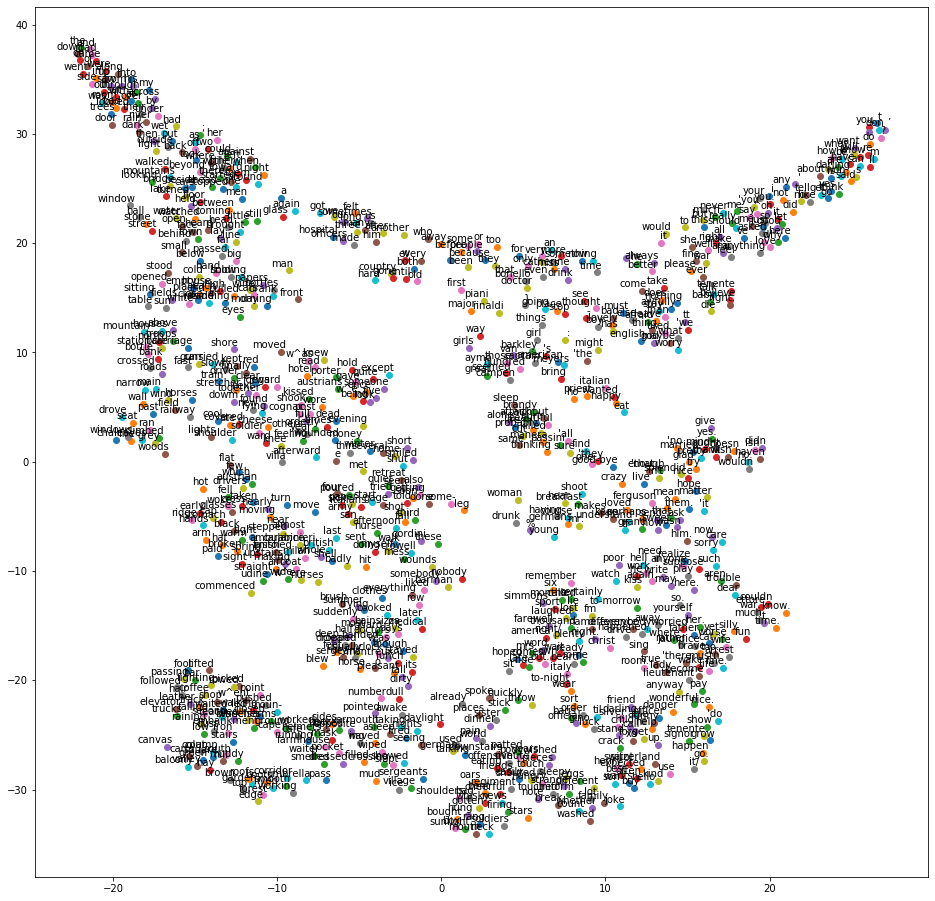

In [11]:
tsne_plot(model)

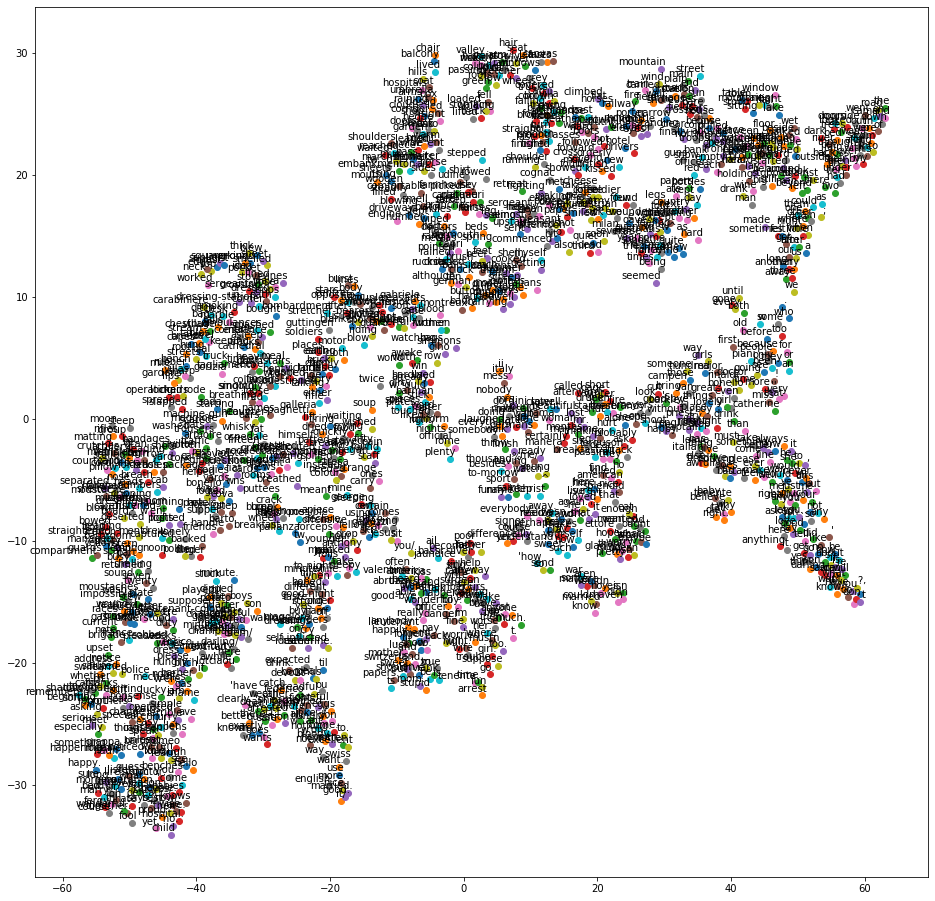

In [12]:
new_model = word2vec.Word2Vec(farewell, size=100, window=20, min_count=5, workers=4)
tsne_plot(new_model)

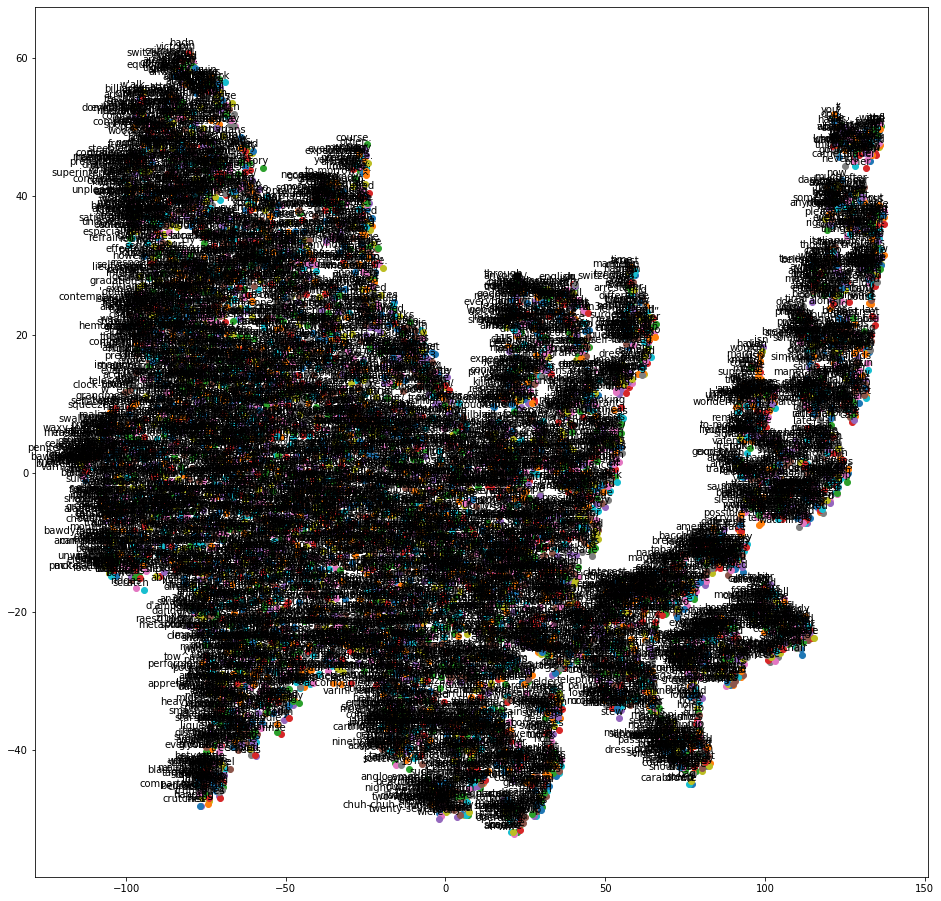

In [13]:
one_model = word2vec.Word2Vec(farewell, size=100, window=20, min_count=1, workers=4)
tsne_plot(one_model)

In [17]:
model.most_similar('life')

[('afraid', 0.9990324378013611),
 ('suppose', 0.9988851547241211),
 ('thing', 0.9988408088684082),
 ('better', 0.9988328218460083),
 ('always', 0.9987877607345581),
 ('god', 0.9987552762031555),
 ('leave', 0.9986499547958374),
 ("'no", 0.9986074566841125),
 ('tired', 0.9985216856002808),
 ('mean', 0.998435378074646)]

In [15]:
new_model.most_similar('enchanted')

KeyError: "word 'enchanted' not in vocabulary"

In [16]:
model.most_similar_cosmul('hope')